In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

import zipfile

--2024-08-31 15:20:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  72.4MB/s    in 4.7s    

2024-08-31 15:20:45 (104 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip",'r')
zip_ref.extractall()
zip_ref.close()

In [6]:
import os

#Walk through 10 classes of food
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [19]:
train_dir='10_food_classes_all_data/train/'
test_dir='10_food_classes_all_data/test/'

In [20]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  print(type(random_image))

  img=mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image shape:{img.shape}")
  print(f"Image :{img}")
  plt.axis('off')

  return img

['297480.jpg']
<class 'list'>
Image shape:(512, 382, 3)
Image :[[[ 0  2  0]
  [ 0  2  0]
  [ 0  2  0]
  ...
  [ 2  2  0]
  [ 2  2  0]
  [ 2  2  0]]

 [[ 0  2  0]
  [ 0  2  0]
  [ 0  2  0]
  ...
  [ 2  2  0]
  [ 2  2  0]
  [ 2  2  0]]

 [[ 0  2  0]
  [ 0  2  0]
  [ 0  2  0]
  ...
  [ 2  2  0]
  [ 2  2  0]
  [ 2  2  0]]

 ...

 [[16 12  0]
  [16 12  0]
  [16 12  0]
  ...
  [ 3  5  0]
  [ 3  5  0]
  [ 3  5  0]]

 [[18 14  2]
  [17 13  1]
  [17 13  1]
  ...
  [ 3  5  0]
  [ 3  5  0]
  [ 3  5  0]]

 [[18 14  2]
  [18 14  2]
  [17 13  1]
  ...
  [ 3  5  0]
  [ 3  5  0]
  [ 3  5  0]]]


array([[[ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0],
        ...,
        [ 2,  2,  0],
        [ 2,  2,  0],
        [ 2,  2,  0]],

       [[ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0],
        ...,
        [ 2,  2,  0],
        [ 2,  2,  0],
        [ 2,  2,  0]],

       [[ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0],
        ...,
        [ 2,  2,  0],
        [ 2,  2,  0],
        [ 2,  2,  0]],

       ...,

       [[16, 12,  0],
        [16, 12,  0],
        [16, 12,  0],
        ...,
        [ 3,  5,  0],
        [ 3,  5,  0],
        [ 3,  5,  0]],

       [[18, 14,  2],
        [17, 13,  1],
        [17, 13,  1],
        ...,
        [ 3,  5,  0],
        [ 3,  5,  0],
        [ 3,  5,  0]],

       [[18, 14,  2],
        [18, 14,  2],
        [17, 13,  1],
        ...,
        [ 3,  5,  0],
        [ 3,  5,  0],
        [ 3,  5,  0]]], dtype=uint8)
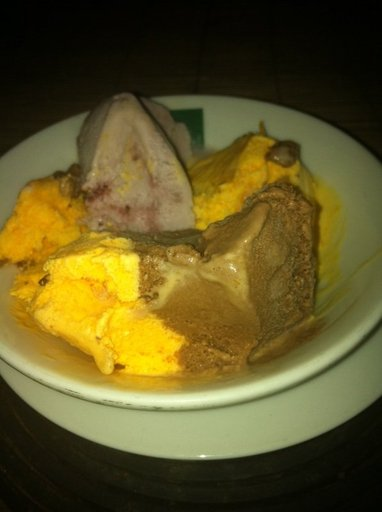

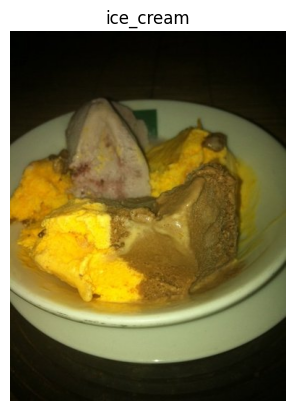

In [22]:
view_random_image(train_dir,random.choice(class_names))

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

#Load data in from directory and convert it into batches of size 32
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             shuffle=True,
                                             class_mode='categorical')

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           shuffle=True,
                                           class_mode='categorical')



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D,Flatten,Conv2D, Activation
from tensorflow.keras.optimizers import Adam

model_1=Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

model_1.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']
                )

In [29]:
history_1=model_1.fit(train_data,epochs=1,steps_per_epoch=len(train_data),
            validation_data=test_data,validation_steps=len(test_data))

235/235 [==============================] - 513s 2s/step - loss: 2.1938 - accuracy: 0.1844 - val_loss: 2.0196 - val_accuracy: 0.2776


In [30]:
def plot_loss_curves(history):
  """
  Plot the loss curve for training and validation metrics"""

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(loss))
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title("accuracy")
  plt.xlabel('epochs')
  plt.legend()

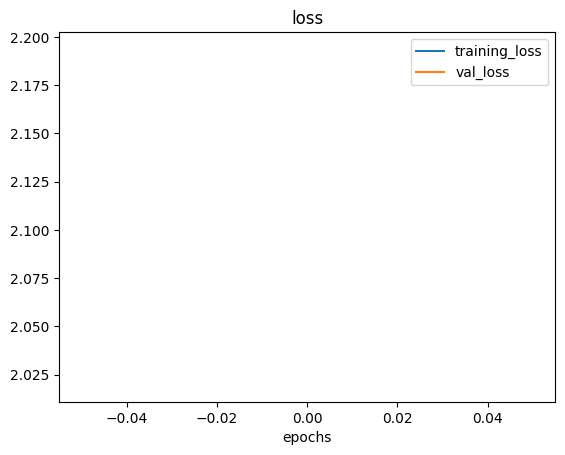

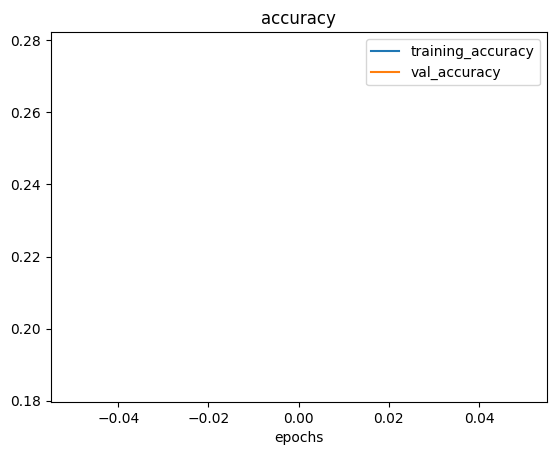

In [31]:
plot_loss_curves(history_1)

In [32]:
model_2=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')

])

model_2.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [33]:
history_2 = model_2.fit(train_data,epochs=1,steps_per_epoch=len(train_data),
            validation_data=test_data,validation_steps=len(test_data))

235/235 [==============================] - 239s 1s/step - loss: 2.1124 - accuracy: 0.2428 - val_loss: 1.9237 - val_accuracy: 0.3336


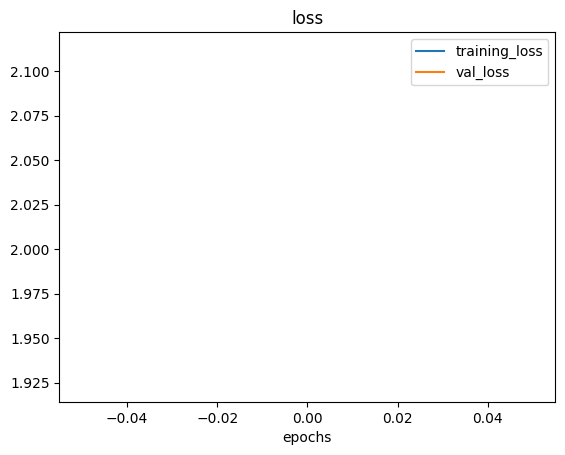

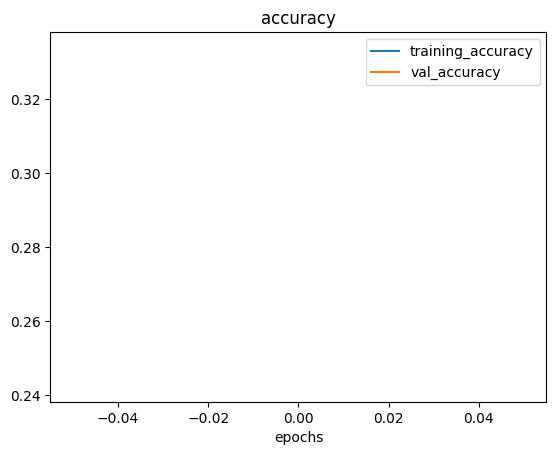

In [38]:
plot_loss_curves(history_2)

##Trying to reduce overfitting with data augmentation

In [34]:
from keras.preprocessing.image import ImageDataGenerator

In [36]:
train_datagen=ImageDataGenerator(rescale=1/255.,
                                 rotation_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

train_data_augmented=train_datagen.flow_from_directory(directory=train_dir,
                                                       target_size=(224,224),
                                                       batch_size=32,
                                                       class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [40]:
import tensorflow as tf

In [42]:
model_3=tf.keras.models.clone_model(model_1)
model_3.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_3=model_3.fit(train_data_augmented,epochs=1,validation_data=test_data,steps_per_epoch=len(train_data_augmented),
            validation_steps=len(test_data))

235/235 [==============================] - 630s 3s/step - loss: 2.1500 - accuracy: 0.2117 - val_loss: 1.9437 - val_accuracy: 0.3236


In [43]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_2 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [44]:
model_3.evaluate(test_data)


79/79 [==============================] - 54s 680ms/step - loss: 1.9437 - accuracy: 0.3236


[1.9436980485916138, 0.32359999418258667]

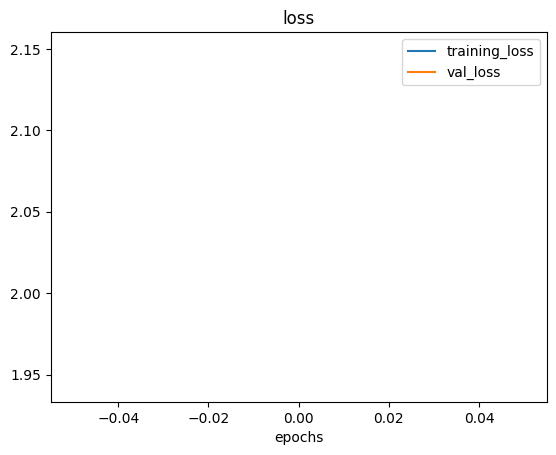

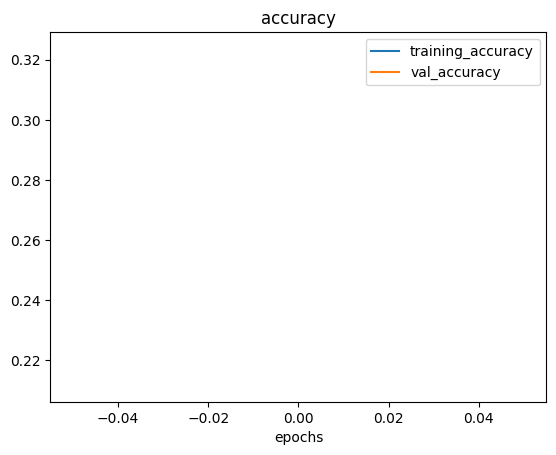

In [45]:
plot_loss_curves(history_3)

In [46]:
def load_and_pred_image(filename,img_shape):

  #Reading the image
  img=tf.io.read_file(filename)
  #Decoding the image and converting it into tensors
  img=tf.image.decode_image(img)
  #Resizing the image to (224,224)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  #Here we are normalizing the image to have value between 0 and 1
  img=img/255.
  return img



In [ ]:
tf.expand_dims()

In [74]:
def pred_and_plot(model,filename,class_names=class_names):
  img=load_and_pred_image(filename,224)
  pred=model.predict(tf.expand_dims(img,axis=0))

  if len(pred[0])>1:
    pred_class=class_names[tf.argmax(pred[0])]
  else:

    pred_class=class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 71ms/step


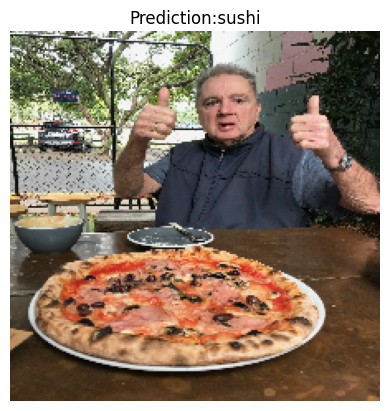

In [75]:
pred_and_plot(model_3,"03-pizza-dad.jpeg")

In [76]:
model_3.save("model_3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
model_3.save("model_3")

In [79]:
loaded_model_10=tf.keras.models.load_model('model_3')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 54s 675ms/step - loss: 1.9437 - accuracy: 0.3236


[1.9436984062194824, 0.32359999418258667]

In [80]:
model_3.evaluate(test_data)

79/79 [==============================] - 54s 679ms/step - loss: 1.9437 - accuracy: 0.3236


[1.9436990022659302, 0.32359999418258667]